### Download HRRR Data using Herbie

Notebook contents 

https://herbie.readthedocs.io/en/2024.3.0/user_guide/install.html
* attempting to use Herbie to download HRRR data 

created by Cassie Lumbrazo\
last updated: Jan 2025\
run location: UAS linux\
python environment: **herbie**\
*created a new environment for herbie data downloader...*

In [1]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime, timedelta

import scipy

In [2]:
pwd

'/home/cassie/python/repos/juneau_data_analysis'

In [34]:
from herbie import Herbie
# from toolbox import EasyMap, pc
# from paint.standard2 import cm_tmp

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import os
import glob
import rioxarray


Download the HRRR ak dataset for a specific date to test the download.

In [8]:
H = Herbie(
    "2023-11-01 00:00",
    model="hrrrak",
    product="sfc",
    fxx=6,
)

✅ Found ┊ model=hrrrak ┊ product=sfc ┊ 2023-Nov-01 00:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws


In [7]:
H = Herbie(
    "2023-11-01 01:00",
    model="hrrrak",
    product="sfc",
    fxx=6,
)

💔 Did not find ┊ model=hrrrak ┊ product=sfc ┊ 2023-Nov-01 01:00 UTC F06


In [10]:
H = Herbie(
    "2023-11-01 01:00",
    model="hrrrak",
    product="sfc",
    fxx=0,
)

💔 Did not find ┊ model=hrrrak ┊ product=sfc ┊ 2023-Nov-01 01:00 UTC F00


In [11]:
H = Herbie(
    "2023-11-01 03:00",
    model="hrrrak",
    product="sfc",
    fxx=0,
)

✅ Found ┊ model=hrrrak ┊ product=sfc ┊ 2023-Nov-01 03:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


In [9]:
H = Herbie(
    "2023-11-01 03:00",
    model="hrrrak",
    product="sfc",
    fxx=6,
)

✅ Found ┊ model=hrrrak ┊ product=sfc ┊ 2023-Nov-01 03:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws


### So only data for every 3 hours is archived... 

In [5]:
# show additional products 
H.PRODUCTS

{'prs': '3D pressure level fields; 3-km resolution',
 'sfc': '2D surface level fields; 3-km resolution',
 'nat': 'Native level fields; 3-km resolution',
 'subh': 'Subhourly grids; 3-km resolution'}

In [21]:
H.DESCRIPTION

'High-Resolution Rapid Refresh - Alaska'

In [22]:
H.date

Timestamp('2023-11-01 00:00:00')

In [23]:
H.DETAILS

{'nomads product description': 'https://www.nco.ncep.noaa.gov/pmb/products/hrrr'}

In [24]:
H.product_description

'2D surface level fields; 3-km resolution'

In [25]:
ds = H.xarray("TMP:2 m")
ds

<xarray.Dataset> Size: 24MB
Dimensions:              (y: 919, x: 1299)
Coordinates:
    time                 datetime64[ns] 8B 2023-11-01
    step                 timedelta64[ns] 8B 06:00:00
    heightAboveGround    float64 8B 2.0
    latitude             (y, x) float64 10MB 41.61 41.63 41.64 ... 76.35 76.34
    longitude            (y, x) float64 10MB 185.1 185.1 185.2 ... 244.1 244.2
    valid_time           datetime64[ns] 8B 2023-11-01T06:00:00
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 5MB 284.2 284.2 284.2 ... 258.6 258.5
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrrak
    product:                 sfc
    description:             High-Resolution Rapid Refresh - Alaska
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              /home/cassie/data/hrrrak/20231101/subset_61b29dd...
    search:                  TMP:2 m

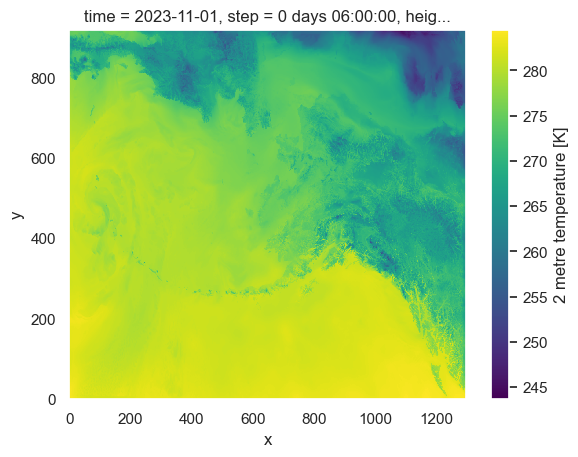

In [26]:
ds['t2m'].plot()

In [19]:
ds['t2m'].attrs

{'GRIB_paramId': 167,
 'GRIB_dataType': 'fc',
 'GRIB_numberOfPoints': 1193781,
 'GRIB_typeOfLevel': 'heightAboveGround',
 'GRIB_stepUnits': 1,
 'GRIB_stepType': 'instant',
 'GRIB_gridType': 'polar_stereographic',
 'GRIB_NV': 0,
 'GRIB_cfName': 'air_temperature',
 'GRIB_cfVarName': 't2m',
 'GRIB_gridDefinitionDescription': 'Polar stereographic can be south or north',
 'GRIB_missingValue': 3.4028234663852886e+38,
 'GRIB_name': '2 metre temperature',
 'GRIB_parameterName': 'Temperature',
 'GRIB_parameterUnits': 'K',
 'GRIB_shortName': '2t',
 'GRIB_stepRange': '6',
 'GRIB_units': 'K',
 'long_name': '2 metre temperature',
 'units': 'K',
 'standard_name': 'air_temperature',
 'grid_mapping': 'gribfile_projection'}

That's only 2-m air temperature, there are other surface fields 

In [20]:
H.PRODUCTS

{'prs': '3D pressure level fields; 3-km resolution',
 'sfc': '2D surface level fields; 3-km resolution',
 'nat': 'Native level fields; 3-km resolution',
 'subh': 'Subhourly grids; 3-km resolution'}

## A test to download hourly data using Herbie then put it all together

This code is working. The only issue is that the hourly data won't download, only every 3 hours.\
But that is not an issue with the code, it's an error with the download itself. 

In [13]:
# Define parameters
START_DATE = "2023-10-01"  # start date
END_DATE = "2023-10-02"    # end date
MODEL = "hrrrak"           # HRRR-AK model
SUBMODEL = "ak"            # Alaska-specific domain
# VARIABLES = ["TMP:2 m", "UGRD:10 m", "VGRD:10 m"]  # Example variables to download
VARIABLES = [
    "TMP:2 m",  # Temperature at 2 meters
    "UGRD:10 m",  # U wind component at 10 meters
    "VGRD:10 m",  # V wind component at 10 meters
    "SPFH:2 m",  # Specific humidity at 2 meters
    "PRES:surface",  # Surface pressure
    "VIS:surface",  # Visibility
    "SWDOWN:surface",  # Surface shortwave radiation flux
    "LWDOWN:surface",  # Surface longwave radiation flux
    "APCP:surface",  # Accumulated precipitation
    "TCDC:surface",  # Total cloud cover
    "SFC:soil moisture and temperature",  # Soil moisture and temperature
    "HGT:surface",  # Surface geopotential height
    "RH:2 m",  # Relative humidity at 2 meters
    "U:10 m",  # U wind component at 10 meters
    "V:10 m"  # V wind component at 10 meters
]  # Example variables to download

# Paths for saving files
HOURLY_DIR = "/home/cassie/data/hrrrak/netcdf"  # Directory for hourly files
MERGE_FILE = "/home/cassie/data/hrrrak/netcdf/netcdf_merge.nc"  # Final merged file

# Create directories if they don't exist
os.makedirs(HOURLY_DIR, exist_ok=True)

# Generate a date range for downloading
date_range = pd.date_range(START_DATE, END_DATE, freq="1h")

# Step 1: Download hourly HRRR-AK data
for date in date_range:
    try:
        print(f"Processing: {date}")
        h = Herbie(date, model=MODEL, product="sfc", domain=SUBMODEL)

        # Check available variables (optional)
        print(h.inventory())

        # Initialize an empty list to store datasets
        datasets = []

        # Loop through each variable and load
        for variable in VARIABLES:
            try:
                ds = h.xarray(variable)
                datasets.append(ds)
            except Exception as e:
                print(f"Error loading variable {variable}: {e}")

        # Merge all datasets, overriding metadata conflicts
        if datasets:
            combined_ds = xr.merge(datasets, compat="override")

            # Save hourly NetCDF
            netcdf_path = os.path.join(HOURLY_DIR, f"HRRR_AK_{date.strftime('%Y%m%d%H')}.nc")
            combined_ds.to_netcdf(netcdf_path)
            print(f"Saved hourly NetCDF: {netcdf_path}")
    except Exception as e:
        print(f"Error processing {date}: {e}")

Processing: 2023-10-01 00:00:00


✅ Found ┊ model=hrrrak ┊ product=sfc ┊ 2023-Oct-01 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
     grib_message  start_byte    end_byte              range reference_time  \
0               1           0    511845.0           0-511845     2023-10-01   
1               2      511846    704072.0      511846-704072     2023-10-01   
2               3      704073   1221366.0     704073-1221366     2023-10-01   
3               4     1221367   1549890.0    1221367-1549890     2023-10-01   
4               5     1549891   2264915.0    1549891-2264915     2023-10-01   
..            ...         ...         ...                ...            ...   
164           165    82563874  82571400.0  82563874-82571400     2023-10-01   
165           166    82571401  82733809.0  82571401-82733809     2023-10-01   
166           167    82733810  82904774.0  82733810-82904774     2023-10-01   
167           168    82904775  83557293.0  82904775-83557293     2023-10-01   
168           169    83557294         Na

### Now that the data is downloaded, merge all the netcdfs into a single netcdf for use

In [14]:
# Step 2: Merge hourly NetCDF files into a single file
print("Merging all hourly files into a single NetCDF...")
try:
    # Find all hourly NetCDF files
    hourly_files = sorted(glob.glob(os.path.join(HOURLY_DIR, "*.nc")))

    # Open all datasets
    datasets = []
    for file in hourly_files:
        ds = xr.open_dataset(file)
        datasets.append(ds)

    # Concatenate datasets along the time dimension
    combined_ds = xr.concat(datasets, dim="time", combine_attrs="override")

    # Save the merged dataset
    combined_ds.to_netcdf(MERGE_FILE)
    print(f"Full-year NetCDF saved at: {MERGE_FILE}")
except Exception as e:
    print(f"Error merging hourly files: {e}")

Merging all hourly files into a single NetCDF...
Full-year NetCDF saved at: /home/cassie/data/hrrrak/netcdf/netcdf_merge.nc


Now, take a look at the full NetCDF. 

In [15]:
ds = xr.open_dataset(MERGE_FILE)
ds

<xarray.Dataset> Size: 406MB
Dimensions:              (y: 919, x: 1299, time: 9)
Coordinates:
    latitude             (y, x) float64 10MB ...
    longitude            (y, x) float64 10MB ...
  * time                 (time) datetime64[ns] 72B 2023-10-01 ... 2023-10-02
    valid_time           (time) datetime64[ns] 72B ...
    step                 timedelta64[ns] 8B ...
    heightAboveGround    float64 8B ...
    gribfile_projection  float64 8B ...
    surface              float64 8B ...
Dimensions without coordinates: y, x
Data variables:
    t2m                  (time, y, x) float32 43MB ...
    u10                  (time, y, x) float32 43MB ...
    v10                  (time, y, x) float32 43MB ...
    sh2                  (time, y, x) float32 43MB ...
    sp                   (time, y, x) float32 43MB ...
    vis                  (time, y, x) float32 43MB ...
    tp                   (time, y, x) float32 43MB ...
    orog                 (time, y, x) float32 43MB ...
    r2                   (time, y, x) float32 43MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrrak
    product:                 sfc
    description:             High-Resolution Rapid Refresh - Alaska
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              /home/cassie/data/hrrrak/20231001/subset_35ef9dd...
    search:                  TMP:2 m

(array([1.700000e+01, 1.003000e+03, 3.493000e+04, 1.947120e+05,
        6.017590e+05, 2.361947e+06, 1.639543e+06, 3.943640e+06,
        1.949399e+06, 1.707900e+04]),
 array([250.38499451, 254.50178528, 258.61859131, 262.73538208,
        266.85217285, 270.96896362, 275.08575439, 279.20257568,
        283.31936646, 287.43615723, 291.552948  ]),
 <BarContainer object of 10 artists>)

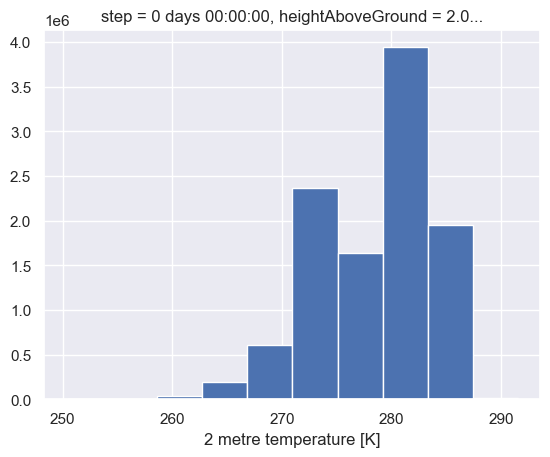

In [16]:
ds.t2m.plot()

So that is the temperature for all the days downloaded

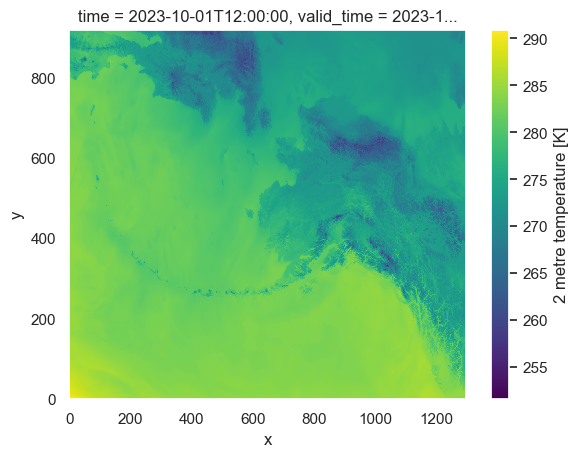

In [17]:
# Now plot t2m for a sinlge date 
ds.t2m.sel(time="2023-10-01 12:00").plot()

And now we have the temperature for a single point in time

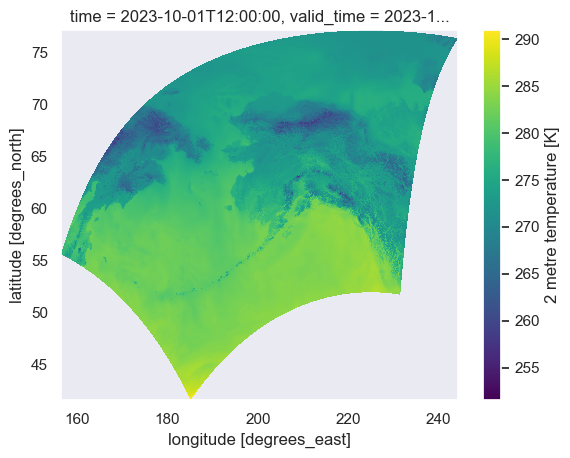

In [ ]:
# plot a smaller region around juneau 
ds.t2m.sel(time="2023-10-01 12:00").plot(x="longitude", y="latitude")

In [38]:
# now zoom into a smaller lat/lon region
# ds.t2m.sel(time="2023-10-01 12:00", longitude=slice(-135, -132), latitude=slice(57, 59)).plot()

In [39]:
ds.coords

Coordinates:
    latitude             (y, x) float64 10MB ...
    longitude            (y, x) float64 10MB ...
  * time                 (time) datetime64[ns] 72B 2023-10-01 ... 2023-10-02
    valid_time           (time) datetime64[ns] 72B ...
    step                 timedelta64[ns] 8B ...
    heightAboveGround    float64 8B ...
    gribfile_projection  float64 8B ...
    surface              float64 8B ...

In [40]:
ds.dims

FrozenMappingWarningOnValuesAccess({'y': 919, 'x': 1299, 'time': 9})

In [32]:
ds.latitude

<xarray.DataArray 'latitude' (y: 919, x: 1299)> Size: 10MB
[1193781 values with dtype=float64]
Coordinates:
    latitude             (y, x) float64 10MB ...
    longitude            (y, x) float64 10MB ...
    step                 timedelta64[ns] 8B ...
    heightAboveGround    float64 8B ...
    gribfile_projection  float64 8B ...
    surface              float64 8B ...
Dimensions without coordinates: y, x
Attributes:
    units:          degrees_north
    standard_name:  latitude
    long_name:      latitude

And, we want to clip this area to a region around Juneau. 

In [41]:
# Define the bounding box for Juneau, Alaska
lat_min, lat_max = 58.25, 58.35
lon_min, lon_max = -134.45, -134.40

# Select the region
selected_region = ds.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))


KeyError: "no index found for coordinate 'latitude'"

In [35]:
ds_ak_merged = xr.open_dataset(MERGE_FILE)

# Define the bounding box for Juneau (latitude and longitude range)
# lat_min, lat_max = 57.354, 59.354
# lon_min, lon_max = -135.556, -133.556
lat_min, lat_max = 58.3, 58.6
lon_min, lon_max = -134.6, -134.2

# Slice the ds_ak_merged based on latitude, longitude, and time
clipped_data = ds_ak_merged.sel(
    latitude=slice(lat_min, lat_max),  # Assuming 'latitude' is the coordinate name
    longitude=slice(lon_min, lon_max),  # Assuming 'longitude' is the coordinate name
    time=slice("2023-10-01", "2023-10-01")  # Adjust for the specific time range
)

# Save the clipped ds_ak_merged to a new file
clipped_data.to_netcdf('/home/cassie/data/hrrrak/netcdf/netcdf_merge_clip.nc')

KeyError: "no index found for coordinate 'latitude'"

In [29]:
print(ds.coords)

Coordinates:
    latitude             (y, x) float64 10MB ...
    longitude            (y, x) float64 10MB ...
  * time                 (time) datetime64[ns] 72B 2023-10-01 ... 2023-10-02
    valid_time           (time) datetime64[ns] 72B ...
    step                 timedelta64[ns] 8B ...
    heightAboveGround    float64 8B ...
    gribfile_projection  float64 8B ...
    surface              float64 8B ...


We also want to do the same download, but with all the variables we need for snow modeling.

Testing merge types, merge vs concat 

In [ ]:
ds1 = xr.open_dataset("/home/cassie/data/hrrrak/netcdf/HRRR_AK_2023100100.nc")
ds2 = xr.open_dataset("/home/cassie/data/hrrrak/netcdf/HRRR_AK_2023100103.nc")
ds3 = xr.open_dataset("/home/cassie/data/hrrrak/netcdf/HRRR_AK_2023100106.nc")

combined_concat= xr.concat([ds1, ds2, ds3], dim="time")
combined_concat

combined_merge = xr.merge([ds1, ds2, ds3], compat="override")
combined_merge

#### This is basically the same code, but it's giving us more info about the data which is not downloading (hourly)

In [74]:
# Define parameters
START_DATE = "2023-10-01"  # Change to desired start date
END_DATE = "2023-10-02"    # Change to desired end date
MODEL = "hrrrak"           # HRRR-AK model
SUBMODEL = "ak"            # Alaska-specific domain
VARIABLES = ["TMP:2 m", "UGRD:10 m", "VGRD:10 m"]  # Example variables to download

# Paths for saving files
HOURLY_DIR = "/home/cassie/data/hrrrak/netcdf"  # Directory for hourly files
FULL_YEAR_FILE = "/home/cassie/data/hrrrak/netcdf/netcdf_merge_test.nc"  # Final merged file

# Create directories if they don't exist
os.makedirs(HOURLY_DIR, exist_ok=True)

# Generate a date range for downloading
date_range = pd.date_range(START_DATE, END_DATE, freq="1h")

# Step 1: Download hourly HRRR-AK data
for date in date_range:
    try:
        print(f"Processing: {date}")
        h = Herbie(date, model=MODEL, product="sfc", domain=SUBMODEL)

        # Download the full file if necessary
        h.download()  # Ensure the full file is downloaded

        # Recreate the Herbie object after download
        h = Herbie(date, model=MODEL, product="sfc", domain=SUBMODEL)

        # Initialize an empty list to store datasets
        datasets = []

        # Loop through each variable and load
        for variable in VARIABLES:
            try:
                ds = h.xarray(variable)
                datasets.append(ds)
            except Exception as e:
                print(f"Error loading variable {variable}: {e}")

        # Merge all datasets, overriding metadata conflicts
        if datasets:
            combined_ds = xr.merge(datasets, compat="override")

            # Save hourly NetCDF
            netcdf_path = os.path.join(HOURLY_DIR, f"HRRR_AK_{date.strftime('%Y%m%d%H')}.nc")
            combined_ds.to_netcdf(netcdf_path)
            print(f"Saved hourly NetCDF: {netcdf_path}")
    except Exception as e:
        print(f"Error processing {date}: {e}")

# Step 2: Merge hourly NetCDF files into a single file
print("Merging all hourly files into a single NetCDF...")
try:
    # Find all hourly NetCDF files
    hourly_files = sorted(glob.glob(os.path.join(HOURLY_DIR, "*.nc")))

    # Open all datasets
    datasets = []
    for file in hourly_files:
        ds = xr.open_dataset(file)
        datasets.append(ds)

    # Concatenate datasets along the time dimension
    combined_ds = xr.concat(datasets, dim="time", combine_attrs="override")

    # Save the merged dataset
    combined_ds.to_netcdf(FULL_YEAR_FILE)
    print(f"Full-year NetCDF saved at: {FULL_YEAR_FILE}")
except Exception as e:
    print(f"Error merging hourly files: {e}")


Processing: 2023-10-01 00:00:00
✅ Found ┊ model=hrrrak ┊ product=sfc ┊ 2023-Oct-01 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
👨🏻‍🏭 Created directory: [/home/cassie/data/hrrrak/20231001]
✅ Found ┊ model=hrrrak ┊ product=sfc ┊ 2023-Oct-01 00:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ aws
Error processing 2023-10-01 00:00:00: Invalid value for attr 'remote_grib': PosixPath('/home/cassie/data/hrrrak/20231001/hrrr.t00z.wrfsfcf00.ak.grib2'). For serialization to netCDF files, its value must be of one of the following types: str, Number, ndarray, number, list, tuple, bytes
Processing: 2023-10-01 01:00:00


🦨 GRIB2 file not found: self.model='hrrrak' self.date=Timestamp('2023-10-01 01:00:00') self.fxx=0


💔 Did not find ┊ model=hrrrak ┊ product=sfc ┊ 2023-Oct-01 01:00 UTC F00
💔 Did not find ┊ model=hrrrak ┊ product=sfc ┊ 2023-Oct-01 01:00 UTC F00
Error loading variable TMP:2 m: 
No index file was found for None
Download the full file first (with `H.download()`).
You will need to remake the Herbie object (H = `Herbie()`)
or delete this cached property: `del H.index_as_dataframe()`
Error loading variable UGRD:10 m: 
No index file was found for None
Download the full file first (with `H.download()`).
You will need to remake the Herbie object (H = `Herbie()`)
or delete this cached property: `del H.index_as_dataframe()`
Error loading variable VGRD:10 m: 
No index file was found for None
Download the full file first (with `H.download()`).
You will need to remake the Herbie object (H = `Herbie()`)
or delete this cached property: `del H.index_as_dataframe()`
Processing: 2023-10-01 02:00:00


🦨 GRIB2 file not found: self.model='hrrrak' self.date=Timestamp('2023-10-01 02:00:00') self.fxx=0


💔 Did not find ┊ model=hrrrak ┊ product=sfc ┊ 2023-Oct-01 02:00 UTC F00
💔 Did not find ┊ model=hrrrak ┊ product=sfc ┊ 2023-Oct-01 02:00 UTC F00
Error loading variable TMP:2 m: 
No index file was found for None
Download the full file first (with `H.download()`).
You will need to remake the Herbie object (H = `Herbie()`)
or delete this cached property: `del H.index_as_dataframe()`
Error loading variable UGRD:10 m: 
No index file was found for None
Download the full file first (with `H.download()`).
You will need to remake the Herbie object (H = `Herbie()`)
or delete this cached property: `del H.index_as_dataframe()`
Error loading variable VGRD:10 m: 
No index file was found for None
Download the full file first (with `H.download()`).
You will need to remake the Herbie object (H = `Herbie()`)
or delete this cached property: `del H.index_as_dataframe()`
Processing: 2023-10-01 03:00:00
✅ Found ┊ model=hrrrak ┊ product=sfc ┊ 2023-Oct-01 03:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


KeyboardInterrupt: 